## 一、首先通过代码生成图片分析有几类图片

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


figure = plt.figure()
ax = Axes3D(figure)
X = np.arange(-3,3,0.05)
Y = np.arange(-3,3,0.05)
X,Y = np.meshgrid(X,Y)

i,j =1,100

for i in np.arange(-10, 11, 5):
    for j in np.arange(-10, 11, 5):

        ax = Axes3D(figure)
        figure.add_axes(ax)
        a,b = round(i,2),round(j,2)
        figure.suptitle(f"a={a},b={b}")
        Z = (a-X)**2 + b*(Y-X**2)**2
        ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='rainbow')

        plt.xlabel("X")
        plt.ylabel("Y")

        plt.savefig(f".\CH1-机器学习的数学基础\CH1-机器学习的数学基础\阶段一作业\pic\A是{a}B是{b}.png")
# plt.pause(20000)

figure.clf()


plt.show()



### 结果如下

![title](./pic/汇总.png)

## 二、梯度下降法找到不同ab时的全局最小值

C:\Users\wdp\AppData\Local\Temp/ipykernel_7464/492325422.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)#Axes3D对象


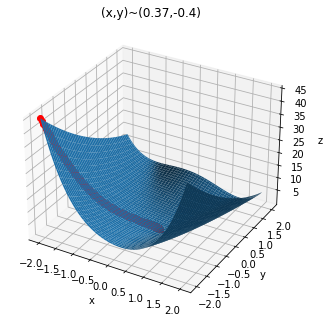

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 
def Fun(x,y,a=1,b=1):#原函数
    return (a-x)**2 + b*(y-x**2)**2
 
def PxFun(x,y,a=1,b=1):#偏x导
    return (2*b+2)*x-2*b*y**2-2*a
 
def PyFun(x,y,a=1,b=1):#偏y导
    return 4*b*y**3-4*b*x*y
 
#初始化
a = float(input('请输入a:'))
b = float(input("请输入b:"))
fig=plt.figure()#figure对象
ax=Axes3D(fig)#Axes3D对象
X,Y=np.mgrid[-2:2:100j,-2:2:100j]#取样并作满射联合
Z=Fun(X,Y,a,b)#取样点Z坐标打表
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
 
#梯度下降
step=0.0008#下降系数
x=-2
y=-2#初始选取一个点
tag_x=[x]
tag_y=[y]
tag_z=[Fun(x,y,a,b)]#三个坐标分别打入表中，该表用于绘制点
new_x=x
new_y=y
Over=False
while Over==False:
    new_x-=step*PxFun(x,y,a,b)
    new_y-=step*PyFun(x,y,a,b)#分别作梯度下降
    if Fun(x,y,a,b)-Fun(new_x,new_y,a,b)<7e-9:#精度
        Over=True
    x=new_x
    y=new_y#更新旧点
    tag_x.append(x)
    tag_y.append(y)
    tag_z.append(Fun(x,y,a,b))#新点三个坐标打入表中
 
#绘制点/输出坐标
ax.plot(tag_x,tag_y,tag_z,'ro')
plt.title(f'(x,y)~({round(x,2)},{round(y,2)})')
plt.show()